# Lab 2 - Windowing

### Mikołaj Zuziak, variant 9

Generate three sine signals of given f1, f2, and f3 and amplitude |x[k]|max
for the sampling frequency fs in the range of 0 ≤ k < N.
Plot: 1 1. the "normalized" level of the DFT spectra. 2. the window
DTFT spectra normalized to their mainlobe maximum. The intervals for f,
Ω, and amplitudes should be chosen by yourself for the best interpretation
purposes.

Input data (variant specific):
- f1 = 600
- f2 = 600.25
- f3 = 599.75
- |x[k]|max = 3
- fs = 500
- N = 200
---

## Solution

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal. windows import hann, flattop

Input data

In [2]:
f1 = 600  # Hz
f2 = 600.25  # Hz
f3 = 599.75  # Hz
amplitude = 3  # |x[k]|max
fs = 500  # Hz
N = 2000
k = np.arange(N)

Generating Signals

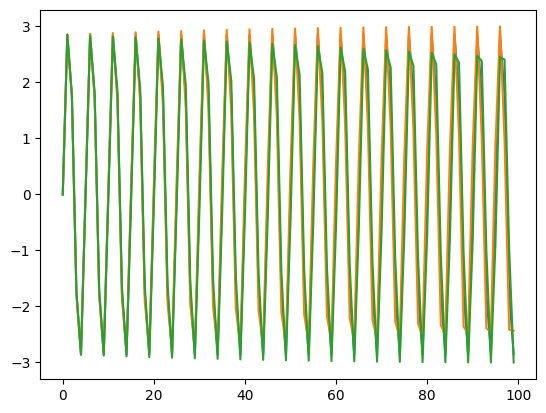

In [3]:
x1 = amplitude * np.sin(2 * np.pi * f1 / fs * k)
x2 = amplitude * np.sin(2 * np.pi * f2 / fs * k)
x3 = amplitude * np.sin(2 * np.pi * f3 / fs * k)

plt.plot(x1[0:100])
plt.plot(x2[0:100])
plt.plot(x3[0:100])

#### Prepare windows

In [4]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

#### Compute the DFT spectra

In [5]:
X1wrect = fft(x1 * wrect)
X2wrect = fft(x2 * wrect)
X3wrect = fft(x3 * wrect)

X1whann = fft(x1 * whann)
X2whann = fft(x2 * whann)
X3whann = fft(x3 * whann)

X1wflattop = fft(x1 * wflattop)
X2wflattop = fft(x2 * wflattop)
X3wflattop = fft(x3 * wflattop)

#### Plot normalized DTF spectra

In [6]:
#Normalization function
def fft2db(X):
    N = X.size
    Xtmp = 2/N * X
    Xtmp[0] *= 1/2

    if N%2 == 0:
        Xtmp[N//2] *= 1/2
    
    return 20*np.log10(np.abs(Xtmp)) #dB

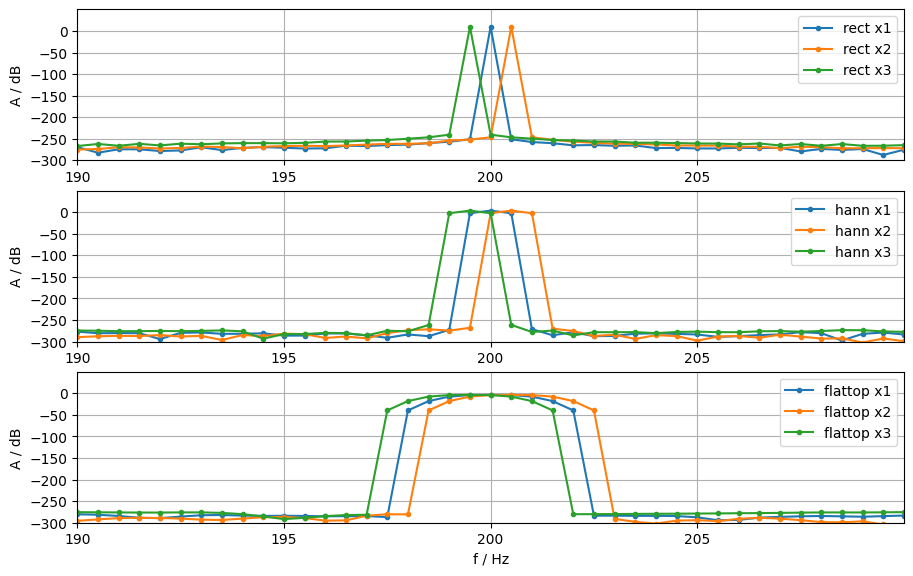

In [7]:
df = fs/N
f = np.arange(N) * df * 2

plt.figure(figsize=(16/1.5, 10/1.5))

#Plot for wrect
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), 'C0o-', ms=3, label='rect x1')
plt.plot(f, fft2db(X2wrect), 'C1o-', ms=3, label='rect x2')
plt.plot(f, fft2db(X3wrect), 'C2o-', ms=3, label='rect x3')
plt.xlim(190, 210)
plt.ylim(-300, 50)
plt.xticks(np.arange(190, 210, 5))
plt.yticks(np.arange(-300, 50, 50))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)

#Plot for whann
plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), 'C0o-', ms=3, label='hann x1')
plt.plot(f, fft2db(X2whann), 'C1o-', ms=3, label='hann x2')
plt.plot(f, fft2db(X3whann), 'C2o-', ms=3, label='hann x3')
plt.xlim(190, 210)
plt.ylim(-300, 50)
plt.xticks(np.arange(190, 210, 5))
plt.yticks(np.arange(-300, 50, 50))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)

#Plot for wflattop
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), 'C0o-', ms=3, label='flattop x1')
plt.plot(f, fft2db(X2wflattop), 'C1o-', ms=3, label='flattop x2')
plt.plot(f, fft2db(X3wflattop), 'C2o-', ms=3, label='flattop x3')
plt.xlim(190, 210)
plt.ylim(-300, 50)
plt.xticks(np.arange(190, 210, 5))
plt.yticks(np.arange(-300, 50, 50))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

#### Plot window DTFT spectra normalized to their mainlobe maximum

In [8]:
def winDTFTdB(w):
    N = w.size  # get window length
    Nz = 100 * N  # zero padding length
    W = np.zeros(Nz)  # allocate RAM
    W[0:N] = w  # insert window
    W = np.abs(fftshift(fft(W)))  # fft, fftshift and magnitude
    W /= np.max(W)  # normalize to maximum, i.e. the mainlobe maximum here
    W = 20 * np.log10(W)  # get level in dB
    # get appropriate digital frequencies
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # also shifted
    return Omega, W

C:\Users\mikiz\AppData\Local\Temp\ipykernel_11724\73734404.py:8: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)  # get level in dB


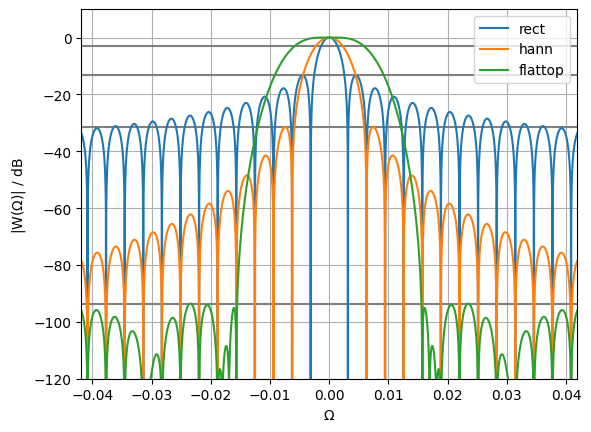

In [ ]:
plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray')  # mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray')  # rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray')  # hann max sidelobe
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], 'gray')  # flattop max sidelobe

Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='rect')
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='hann')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='flattop')

plt.xlim(-np.pi / 75, np.pi / 75)  # zoom into mainlobe
plt.ylim(-120, 10)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)

## Conclusions
## Window Performance Analysis

### Best and Worst Case Scenarios
- **Best case for frequency resolution**: The rectangular window demonstrated superior frequency resolution capability, allowing the three closely spaced frequency components to be distinguished as separate peaks. However, this came at the cost of significant spectral leakage, evidenced by high sidelobe levels.

- **Best case for amplitude accuracy**: The flat-top window showcased exceptional amplitude accuracy with extremely low sidelobe levels, virtually eliminating spectral leakage. This makes it ideal for applications where precise amplitude measurement is critical.

- **Worst case for frequency resolution**: The flat-top window, despite its excellent amplitude accuracy, exhibited the poorest frequency resolution with its widest main lobe. This caused the closely spaced frequency components to appear more merged and less distinguishable.

- **Worst case for sidelobe suppression**: The rectangular window performed worst in terms of spectral leakage, with high sidelobe levels causing significant interference between the frequency components.

- **Balanced performance**: The Hann window offered a good compromise, with moderate main lobe width providing reasonable frequency resolution while maintaining good sidelobe suppression.

## Differences Between f₁ and f₂ Results

The signals with frequencies f₁ = 600 Hz and f₂ = 600.25 Hz showed different spectral characteristics despite their similar frequencies, primarily due to:

1. **Window Function Effects**: 
   - With the rectangular window, both frequencies appear as distinct peaks but with significant interference from sidelobes.
   - With the Hann window, the distinction becomes clearer due to reduced sidelobe interference, although the main lobes are wider.
   - With the flat-top window, the frequencies become less distinguishable as the wider main lobes begin to merge.

2. **Spectral Leakage**: The signals at f₁ and f₂ experience different patterns of spectral leakage depending on their alignment with the DFT bin centers. Since f₁ = 600 Hz corresponds more closely to an integer multiple of the frequency resolution (2.4 × 0.25 Hz), it experiences less spectral leakage than f₂ = 600.25 Hz, which falls between bin centers.